In [64]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 

# file/data preprocessing
def data_process(csv_name):
    '''
    File preprocessing of the pandas dataframe of a csv file
    
    Parameters: 
    csv_name: file path to a csv file
    
    Note that we assume the file corresponding to file path 'csv_name' has same format 
    as the csv in https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    
    Returns:
    tumor_id: vector of the id numbers
    y: malignant or benign for tumors (1 for malignant, 0 for benign)
    x: array of 9 dimensional vector for all tumors
    '''
    # read file
    df = pd.read_csv(csv_name)
    
    # splitting id, diagnosis, and features into 3 different np arrays
    
    tumor_id = df['id']
    
    y = df['diagnosis']
    y = np.array(y)
    y = np.where(y == 'M', 1, 0)
    
    # 9 means chosen, disregarding compactness
    
    x = df[['radius_mean', 'texture_mean', 'perimeter_mean', 
       'area_mean', 'smoothness_mean', 'concavity_mean', 
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
    x = np.array(x)
    
    return tumor_id, y, x
    
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        """
        Compute the sigmoid function
        """
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        """
        Make predictions using the trained model
        
        Parameters:
        X: numpy array of shape (n_samples, n_features)
        
        Returns:
        predictions: numpy array of shape (n_samples,)
        """
        # z = wx + b
        linear_model = np.dot(X, self.weights) + self.bias
        
        # sigmoid(z)
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)
    
    def predict_proba(self, X):
        """
        Predict probability estimates
        
        Parameters:
        X: numpy array of shape (n_samples, n_features)
        
        Returns:
        probabilities: numpy array of shape (n_samples,)
        """
        
        # predictions of sigmoid function
        # if >= 0.5, 1, else benign
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def binary_cross_entropy(self, y_true, y_pred):
        """
        Compute the binary cross-entropy loss.
    
        Parameters:
        y_true: numpy array of shape (n_samples,) - True labels
        y_pred: numpy array of shape (n_samples,) - Predicted probabilities
    
        Returns:
        loss: float - Binary cross-entropy loss
        """
        
        # bce loss = ylog(y_pred) + (1-y)log(1-y_pred)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y, E):
        """
        Train the logistic regression model
        
        Parameters:
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        E: error allowed to consider for convergence to 0
        """
        
        # get rows and cols of input array
        n_samples, n_features = X.shape
        
        # ensure weights and bias are set to 0
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        # arrays to be used as x and y for loss graph
        L_vals = [];
        epochs = [];
        
        # track at which epoch the the error convergers to 0
        count = 0;
        
        # for n epochs
        for _ in range(self.num_iterations):
            
            # sigmoid and z
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            
            # gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            count = count + 1;
            
            loss = self.binary_cross_entropy(y,y_predicted)
            
            
            L_vals.append(loss)
            epochs.append(count)
            if loss<E:
                print ("epochs to convergence: ")
                print(count)
                break
            
            
        plt.scatter(np.array(epochs), np.array(L_vals))
        plt.title('Loss Curve')
        plt.xlabel('number of epochs')
        plt.ylabel('binary cross entropy loss')
        plt.show()
        return L_vals[-1]

In [28]:
tumor_id, y, x = data_process('data.csv')
x = np.array(x)
y = np.array(y)


In [29]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

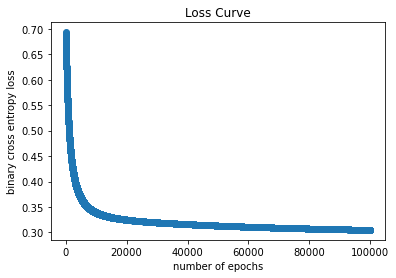

0.3049512858907487
[-4.41419603e-02  5.06032050e-02 -1.71462675e-01  2.37275683e-02
  2.95863882e-04  4.29663313e-03  1.84619394e-03  3.53232026e-04
 -2.96924450e-05] -0.006366278507891543


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(learning_rate=0.000005, num_iterations=100000)
loss = model.fit(x, y, 0.1)
print (loss)
print(model.weights, model.bias)

In [63]:
model.weights

array([-4.41419603e-02,  5.06032050e-02, -1.71462675e-01,  2.37275683e-02,
        2.95863882e-04,  4.29663313e-03,  1.84619394e-03,  3.53232026e-04,
       -2.96924450e-05])

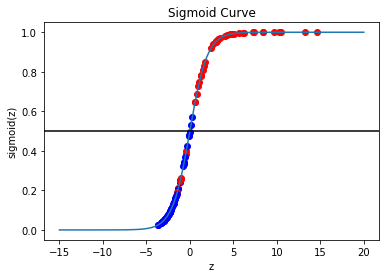

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_axis = np.linspace(-15, 20, 100)
y_axis = sigmoid(x_axis)

data = read_data('data.csv')

x_in = X_test
lin = np.dot(x_in, model.weights) + model.bias
y_predicted = model.sigmoid(lin)

count = 1
for val in y_predicted:
    if (y_test[count-1] > 0.5):
        plt.scatter(lin[count-1], val, color='red')
    else:
        plt.scatter(lin[count-1], val, color='blue')
    count = count + 1;
    
plt.plot(x_axis, y_axis)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Curve')
plt.axhline(y = 0.5, color = 'black', linestyle = '-') 



plt.show()

In [60]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


[0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Confusion Matrix:
[[69  2]
 [ 8 35]]


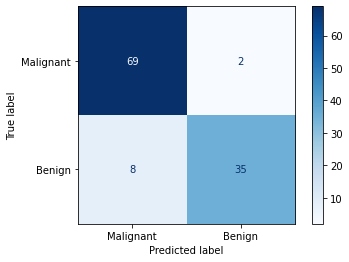

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predicted labels
linear_model = np.dot(X_test, model.weights) + model.bias
y_pred = sigmoid(linear_model)
y_pred = np.array(y_pred)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_test = np.array(y_test)
print (y_pred)


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
disp.plot(cmap="Blues")